<h1 align="center">Devoir #2</h1>
<h4 align="center">Théo Dionne et Jérôme Leblanc</h4>
<h5 align="center">14 avril 2023</h5>

Plusieurs problèmes en physiques requiert des sommes (ou des intégrales dans un cas de figure continu). Un exemple de telles sommes sont celles utilisées pour calculer les valeurs moyennes d'observables au sein de systèmes physiques. Ce genre de calculs pose cependant une problématique majeure; Le nombre de termes dans les sommes en question tend rapidement vers l'infini ce qui demande alors un temps phénoménal (infini!) et peut demander une quantité de ressource numérique qui frôle l'absurde. Il existe cependant une solution à ce problème. Au lieu de considérer tous les termes de la somme, on échantillone ces derniers de manière aléatoire. C'est donc ici qu'entre en jeu l'algorithme *Monte-Carlo*. Ce travail pratique vise à utiliser cet algorithme tel que présenté dans les notes *Méthodes numériques et simulations* de D. Sénéchal (mars 2020) afin de calculer les observables du modèle d'Ising tel que l'énergie et l'aimantation.

## Modèle d'Ising

Le modèle d'Ising est un modèle simplifié représentant une grille de spins également espacés l'un de l'autre dont l'énergie totale est régie par le hamiltonien:

$$
    \mathrm{H}[s] = -J\sum_{\langle ij \rangle}s_is_j
$$

Où $s$ représente une configuration du système et les variables $s_i$ sont associées aux valeurs de spins, qui sont $\pm 1$. Les observables qui nous intéressent sont l'énergie:

$$
\langle E \rangle = \frac{1}{Z}\sum_s \mathrm H[s]  \exp{-\beta \mathrm H[s]}
$$

Ainsi que l'aimantation:

$$
\langle M \rangle = \frac{1}{Z}\sum_s\sum_i s_i  \exp{-\beta \mathrm H[s]}
$$

Où $Z$ est la fonction de partition:

$$
    Z = \sum_s  \exp{-\beta \mathrm H[s]}
$$

## Méthode

Pour les simulation, voici un bref récapitulatif de la méthode Monte-Carlo appliquée à notre cas d'étude:

1. On initialise aléatoirement une grille de $N\times N$ spins.
2. On effectue 1 000 000 itérations pour réchauffer le système.
3. Une mesure les observables (énergie et aimentation) à chaque 1 000 itérations.
4. On effectue $2^L$ mesures
5. On effectue ces étapes pour un intervalle de températures $T$ espacées de $\Delta T$.

Entre chaque itération, on inverse un spin et on vérifie la différence d'énergie $\Delta E$ avec la configuration précédente. Si l'énergie est plus basse, on accepte le changement. Sinon, on accepte le changement avec une probabilité $\exp{-\Delta E/T}$ (on pose $k_B=1$).

### Simulations

Les paramètres de la simulation sont listés dans le tableau suivant:

| Paramètre  | Valeur |
|------------|-------:|
| N          |     32 |
| $T$        |  [1,4] |
| $\Delta T$ |    0.1 |
| L          |     16 |

**Note:** Dans la simulation, on part d'un haute température pour ensuite descende à basse température. On procéede de cette manière puisque théoriquement, la grille aléatoire de spins est plus près d'un état à haute température qu'à basse température. On s'attend ainsi à converger plus rapiudement vers un états physique au lieu d'aligner tous les spins pour ensuite les ramner à un état chaotique en montant la température.

Les résultats de la simulation sont stockés dans `./exemple_data_MC_ising.csv`. Ces derniers sont utilisés pour les graphiques qui suivent.

In [49]:
# Librairies utilisées
import numpy as np
import matplotlib.pyplot as plt

# Formatage des graphiques
plt.style.use("graphiques.mplstyle")

In [50]:
# Récupérer les informations du fichier de données.
monte_carlo_data = np.genfromtxt("exemple_data_MC_ising.csv",delimiter=",",skip_header=True)

temperature = monte_carlo_data[:,0] # Températures

moy_aimantation = monte_carlo_data[:,1] # Moyenne de l'aimantation
dmoy_aimantation = monte_carlo_data[:,2] # erreur

t_corr_aimantation = monte_carlo_data[:,3] # Temps de corrélation aimantation

moy_energie = monte_carlo_data[:,4] # Moyenne de l'énergie
dmoy_energie = monte_carlo_data[:,5] # erreur

t_corr_energie = monte_carlo_data[:,6] # Temps de corrélation énergie

Tc = 2.2691853142130221

On utilise la température critique (issue de la solution analytique) $T_\text{c}\approx 2.27$ telle qu'indiquée dans le notes du professeur David Sénéchal pour un réseau en deux dimensions. Cette valeur de la température sera utilisée plus loins afin de discuter des résultats.

## Résultats et analyse

### Valeurs moyennes

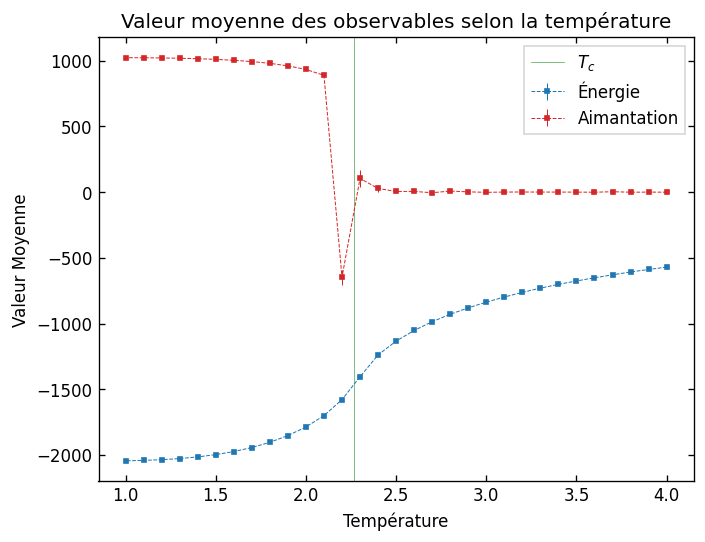

In [51]:
fig = plt.figure()

plt.errorbar(temperature, moy_energie, yerr=dmoy_energie, label="Énergie")
plt.errorbar(temperature, moy_aimantation, yerr=dmoy_aimantation, label="Aimantation")

plt.xlabel("Température")
plt.ylabel("Valeur Moyenne")

plt.title("Valeur moyenne des observables selon la température")

plt.axvline(Tc, c='g', ms=0, ls='-', label="$T_c$", lw=.3)

plt.legend()

plt.show()

Dans la figure ci-haute, on observe les valeurs moyennes de l'aimantation et de l'énergie du système pour plusieurs valeurs de la température. On remarque qu'une discontinuité flagrante saute au yeux pour l'aimantation. En effet, autour de la température critique, l'aimantation semble s'inverser pour ensuite revenir à la valeur attendue (Si on inverse son signe en ce point, la courbe serait continue). Cette erreur peut être attribuée à une erreur statistique vu la nature probabiliste de la méthode. Ce problème ne surgit que pour 1 (ou 2) points par simulations, ce qui n'est pas toujours le cas. En effet, en effectuant des simulation sur un plus petit domaine et avec moins de "binning", il est difficile de reproduire la discontinuité. On assume alors un problème intrinsèque à la méthode. On approfondie cette hypothèse plus loin à l'aide du temps de corrélation.

Pour ce qui est de l'énergie, on a bel et bien que l'énergie est plus haute à haute température et diminue progressivement plus le température descend. On remarque que la pente s'adoucis plus on se rapproche de 1 se qui sous-entend que l'on approche le niveau d'énergie le plus bas à $T\to 0$.

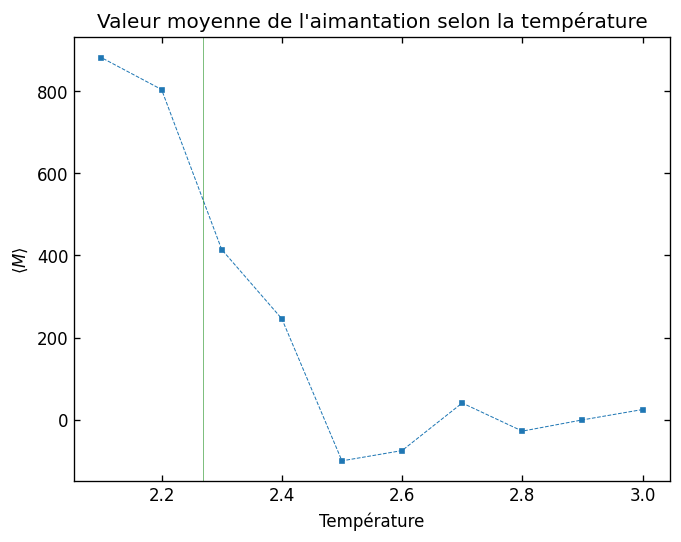

In [55]:
# Récupérer les informations du fichier de données.
monte_carlo_data_verification = np.genfromtxt("data_monte_carlo_ising_test.csv",delimiter=",",skip_header=True)

temperature_verification = monte_carlo_data_verification[:,0] # Températures

moy_aimantation_verification = monte_carlo_data_verification[:,1] # Moyenne de l'aimantation

plt.figure()
plt.plot(temperature_verification, moy_aimantation_verification, label="Aimantation")
plt.axvline(Tc, c='g', ms=0, ls='-', label="$T_c$", lw=.3)
plt.xlabel("Température")
plt.ylabel("$\langle M\\rangle$")

plt.title("Valeur moyenne de l'aimantation selon la température")

plt.show()

Ci-haut un graphique de vérification pour la valeur moyenne de l'aimantation. Les fluctuations sont dûes au niveaux de "binning" plus bas que pour le premier graphique. Malgrès ce bruit, on a quand même le comportement attentu.

### Temps de corrélation

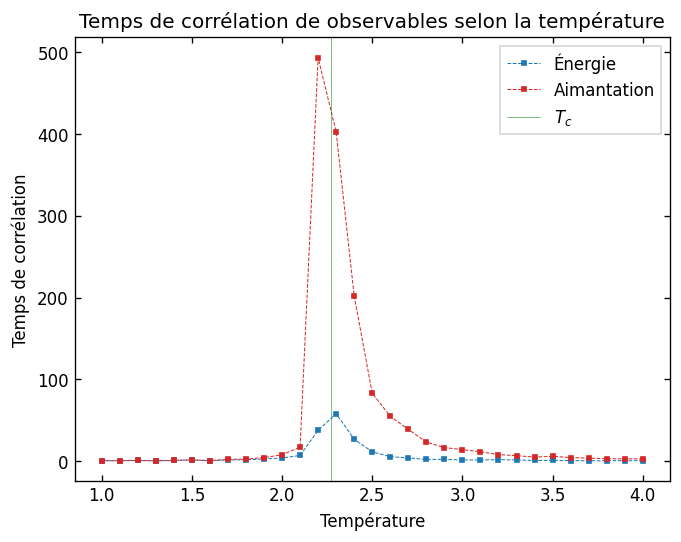

In [53]:
fig = plt.figure()

plt.plot(temperature, t_corr_energie, label="Énergie")
plt.plot(temperature, t_corr_aimantation, label="Aimantation")

plt.xlabel("Température")
plt.ylabel("Temps de corrélation")

plt.axvline(Tc, c='g', ms=0, ls='-', label="$T_c$", lw=.3)

plt.title("Temps de corrélation de observables selon la température")

plt.legend()

plt.show()

On remarque que les deux temps de corrélations restent faibles pour la plupart des températures sauf autour de la température critique $T_c$ comme attendu. Le temps associé à l'énergie ne semble pas diverger beaucoup. Ceci peut expliquer le fait que l'énergie dans le premier graphique ait une transition continue et plus douce lorsque la température passe par $T_c$. Cette observation est en contraste avec le temps de corrélation de l'aimantation. Malgré le fait que ce dernier ne soit pas plus grand que $2^L$ (avec L = 16), le nombre de mesures, on doit quand même le prendre avec un grain de sel. En effet, il se peut que ce dernier atteingne une valeur beaucoup plus grande, mais qu'on ne les voit pas sur le graphique faut d'un intervalle d'échantillonage. Ceci viendrait expliquer la dérivée plus abrute de l'aimantation dans le premier graphique autour de la température critique.